# Homework Assignment 7

**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


In [1]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly_express

import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

     |████████████████████████████████| 92.0MB 54kB/s 
     |████████████████████████████████| 3.5MB 44.7MB/s 
     |████████████████████████████████| 3.6MB 50.0MB/s 
     |████████████████████████████████| 86.4MB 49kB/s 
     |████████████████████████████████| 327kB 45.6MB/s 
     |████████████████████████████████| 18.3MB 257kB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 450kB 41.5MB/s 
     |████████████████████████████████| 3.8MB 39.7MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=eb9ace4ddfd3d3fecebc470a8afc2e2aaeba67bbee9931f37174f4ec4ce537d3
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=0ee6949f086eb73e75d2e812b8ff0fe9afe1710d3932ef3d325419b8468b9dde
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40a

     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53451 sha256=6c29d49a086178e660b46fd5c403311f54f2dfb7fb14d338efabe698b5f3e21a
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 827.9MB 1.3MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=23e11b47b21e6312ab9acf335dc68f694c7f1e6423ed8bac9167b4d546c7364b
  Stored in directory: /tmp/pip-ephem-wheel-cache-u3qd3y9w/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the mo

In [1]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
import kaggle
!mkdir ./datasets
!mkdir ./datasets/dickens

# download the dataset from Kaggle and unzip it
!kaggle datasets download fuzzyfroghunter/dickens -p ./datasets/
!unzip ./datasets/dickens.zip  -d ./datasets/

  0% 0.00/9.28M [00:00<?, ?B/s]
100% 9.28M/9.28M [00:00<00:00, 85.9MB/s]
Archive:  ./datasets/dickens.zip
  inflating: ./datasets/dickens/1289-0.txt  
  inflating: ./datasets/dickens/1400-0.txt  
  inflating: ./datasets/dickens/1467-0.txt  
  inflating: ./datasets/dickens/27924-0.txt  
  inflating: ./datasets/dickens/564-0.txt  
  inflating: ./datasets/dickens/580-0.txt  
  inflating: ./datasets/dickens/644-0.txt  
  inflating: ./datasets/dickens/650-0.txt  
  inflating: ./datasets/dickens/653-0.txt  
  inflating: ./datasets/dickens/675-0.txt  
  inflating: ./datasets/dickens/678-0.txt  
  inflating: ./datasets/dickens/700-0.txt  
  inflating: ./datasets/dickens/766-0.txt  
  inflating: ./datasets/dickens/786-0.txt  
  inflating: ./datasets/dickens/807-0.txt  
  inflating: ./datasets/dickens/882-0.txt  
  inflating: ./datasets/dickens/883-0.txt  
  inflating: ./datasets/dickens/914-0.txt  
  inflating: ./datasets/dickens/917-0.txt  
  inflating: ./datasets/dickens/924-0.txt  
  inflati

##Construct networks of people and locations

###Book 1

In [25]:
import spacy
nlp = spacy.load('en_core_web_lg')
datasets_path = "./datasets/dickens"
oliver_path = f"{datasets_path}/pg699.txt"

In [26]:
from tqdm import tqdm

def get_person_loc_links(txt):
    links_set = set()
    doc = nlp(txt)
    p = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON"]
    l = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "LOC"]
    for e1 in p:
        for e2 in l:
            if e1 == e2 or len(e1) < 2 or len(e2)< 2:
                continue
            links_set.add((e1,e2))

    return links_set

txt = open(oliver_path).read()
paragraphs_list = txt.split("\n\n")

links_list = []    
for para in tqdm(paragraphs_list):

    # for each paragraph each link counts only once
    links_list += list(get_person_loc_links(para))

100%|██████████| 1213/1213 [01:45<00:00, 11.54it/s]


In [27]:
from collections import Counter
c = Counter(links_list)
c.most_common(10)

[(('the earl of warwick', 'earls'), 3),
 (('henry', 'kings'), 2),
 (('richard', 'east'), 2),
 (('queen', 'despensers'), 2),
 (('queen', 'earls'), 2),
 (('queen', 'the king'), 2),
 (('walter raleigh', 'south america'), 2),
 (('james', 'monmouth'), 2),
 (('oak', 'sun'), 1),
 (('gaul', 'sun'), 1)]

In [28]:
import networkx as nx

def filter_links(filter=3):

  g = nx.Graph()

  for e,count in dict(c).items():
      if count < filter:
          # only links that appeared at least 6 times
          continue
      v1,v2 = e
      g.add_edge(v1,v2, weight=count)
  return g
g = filter_links(1)
for e in g.edges():
  v1,v2 = e
  g.nodes[v1]['Type'] = 'PERSON'
  g.nodes[v2]['Type'] = 'LOC'
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 326\nNumber of edges: 448\nAverage degree:   2.7485'

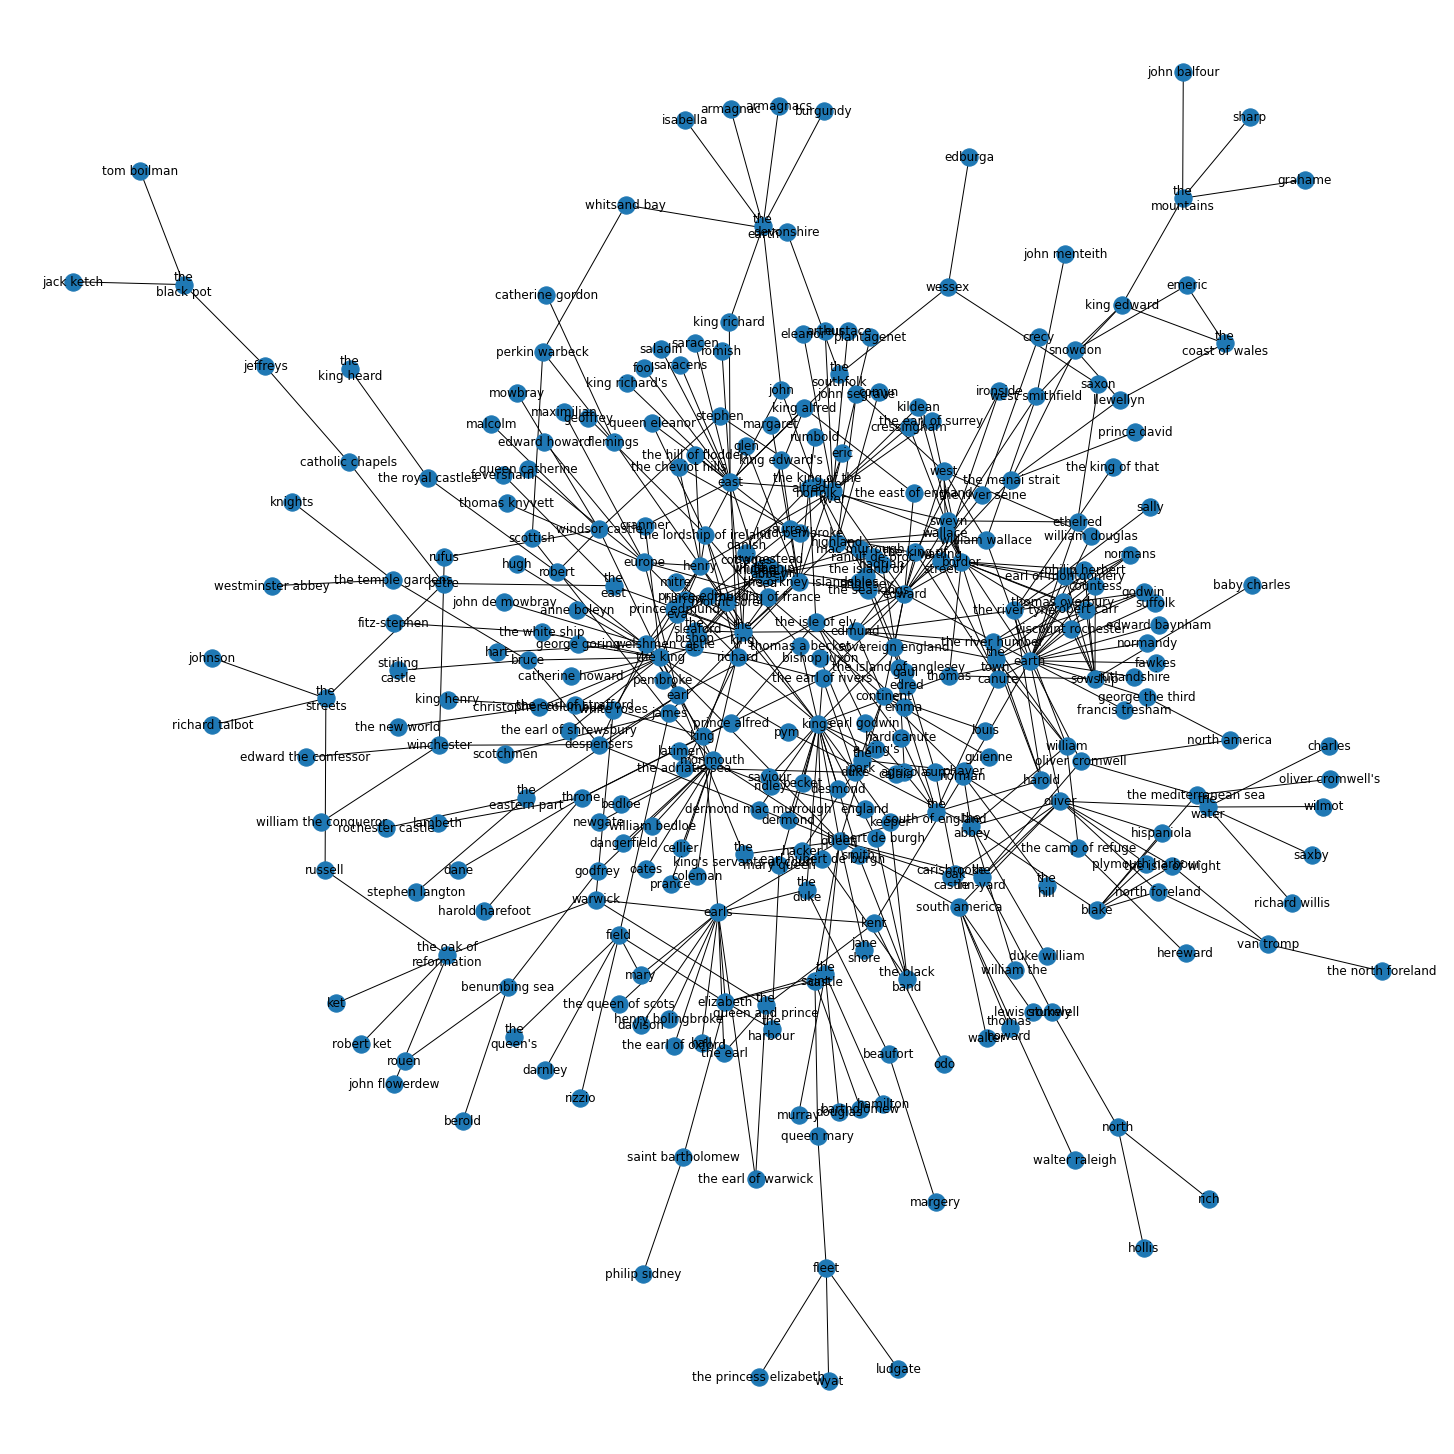

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(g, with_labels=True)

In [30]:
nx.write_gexf(g, "book1.gexf")
nx.write_gml(g,"book1.gml")

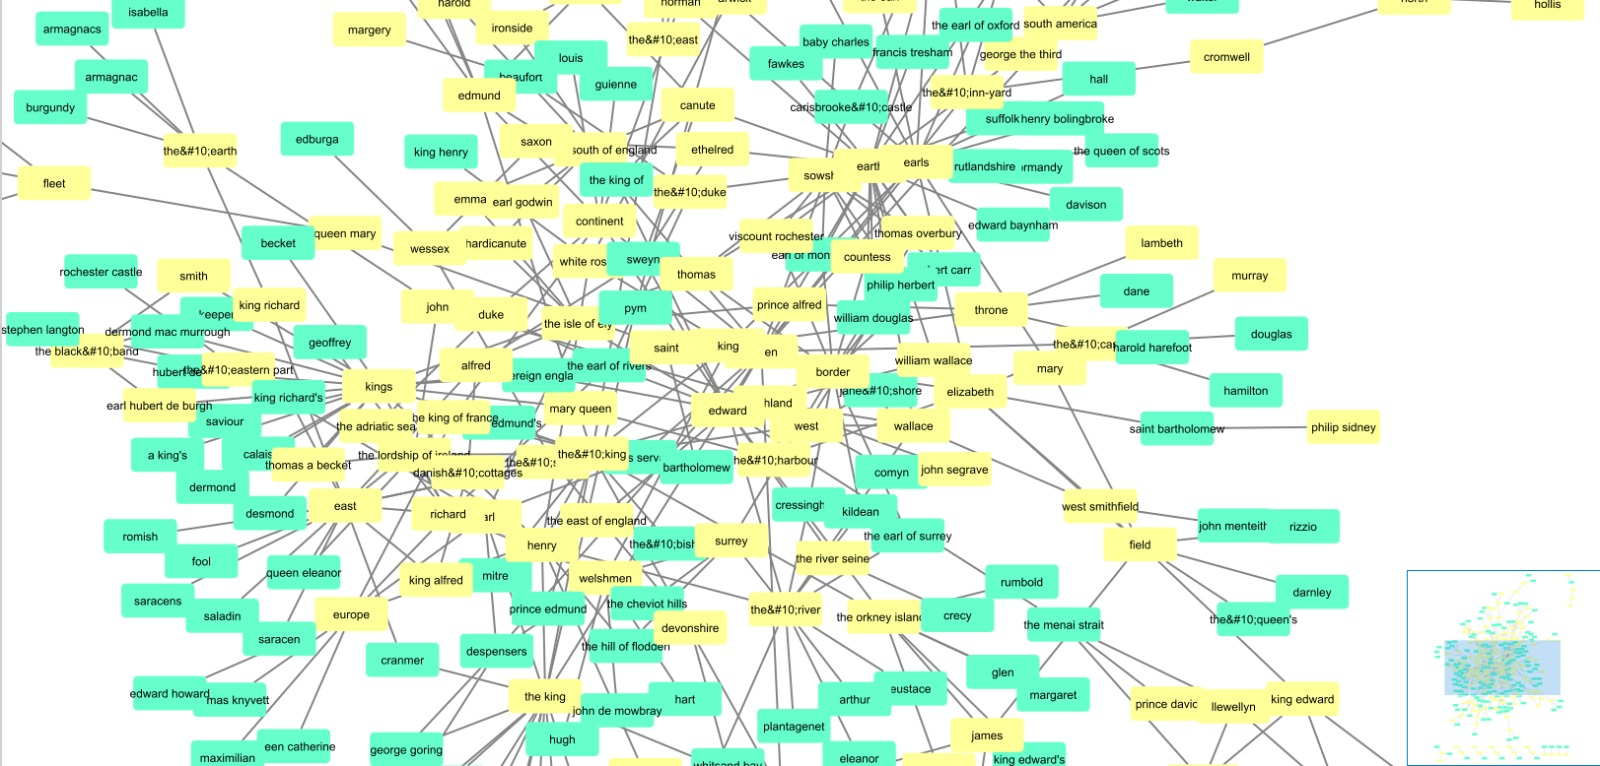

###Book 2

In [18]:
import spacy
nlp = spacy.load('en_core_web_lg')
datasets_path = "./datasets/dickens"
oliver_path = f"{datasets_path}/pg1023.txt"

In [19]:
txt = open(oliver_path).read()
paragraphs_list = txt.split("\n\n")

links_list = []    
for para in tqdm(paragraphs_list):

    # for each paragraph each link counts only once
    links_list += list(get_person_loc_links(para))

100%|██████████| 7450/7450 [08:47<00:00, 14.13it/s]


In [20]:
c = Counter(links_list)
c.most_common(10)

[(('jellyby', 'africa'), 9),
 (('ma', 'africa'), 4),
 (('richard', 'africa'), 3),
 (('summerson', 'africa'), 3),
 (('boythorn', 'earth'), 3),
 (('snagsby', 'cursitor street'), 3),
 (('bagnet', 'europe'), 3),
 (('guppy', 'chancery\nlane'), 2),
 (('peepy', 'africa'), 2),
 (('tulkinghorn', 'earth'), 2)]

In [21]:
g = filter_links(1)
for e in g.edges():
  v1,v2 = e
  g.nodes[v1]['Type'] = 'PERSON'
  g.nodes[v2]['Type'] = 'LOC'
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 158\nNumber of edges: 187\nAverage degree:   2.3671'

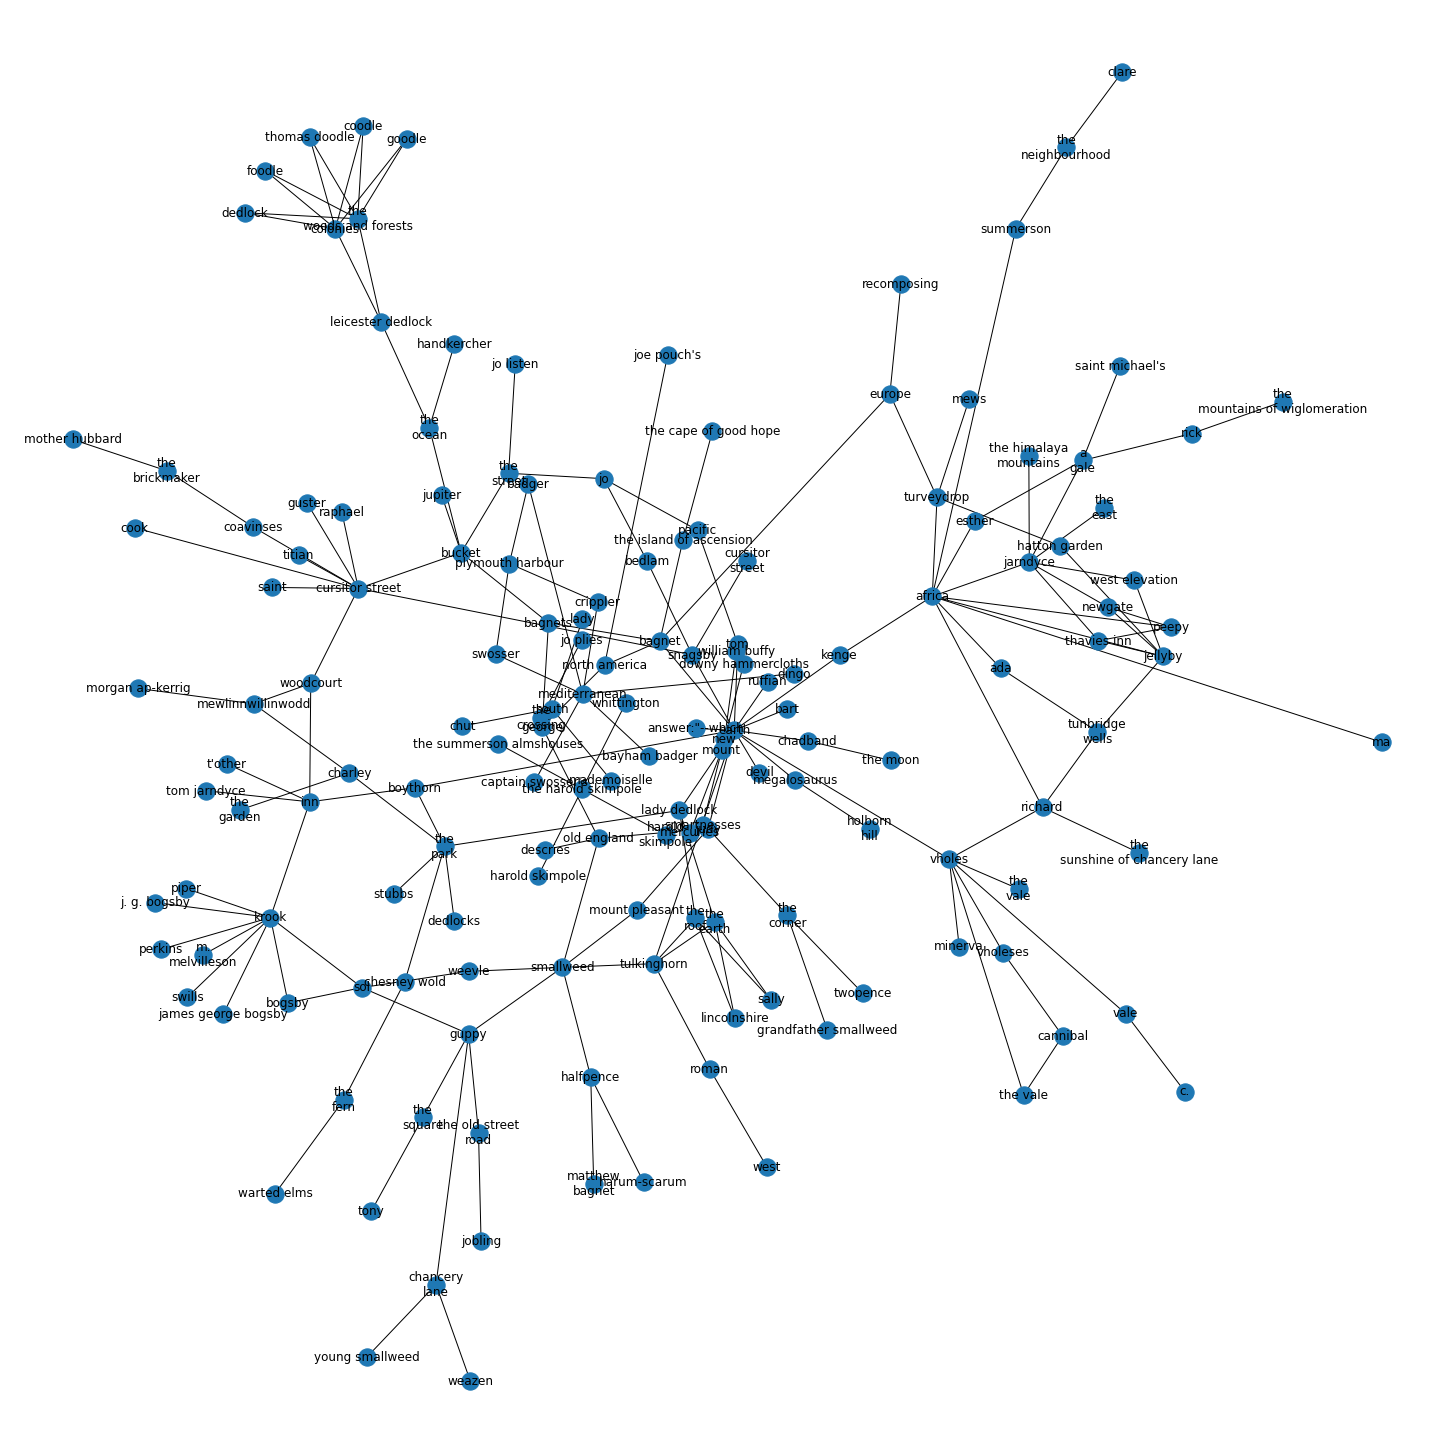

In [22]:
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(g, with_labels=True)

In [24]:
nx.write_gexf(g, "book2.gexf")
nx.write_gml(g,"book2.gml")

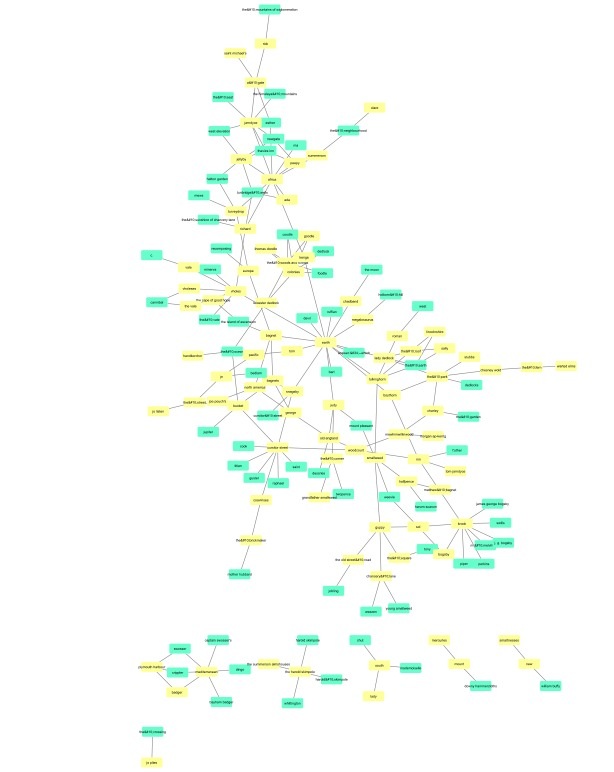

**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [31]:
!mkdir ./datasets/friends

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d ryanstonebraker/friends-transcript -p ./datasets/
!unzip ./datasets/friends-transcript.zip  -d ./datasets/friends/

  0% 0.00/1.72M [00:00<?, ?B/s]
100% 1.72M/1.72M [00:00<00:00, 57.5MB/s]
Archive:  ./datasets/friends-transcript.zip
  inflating: ./datasets/friends/friends_quotes.csv  


In [32]:
import pandas as pd
import turicreate as tc
import turicreate.aggregate as agg

path = "./datasets/friends/friends_quotes.csv"

df = pd.read_csv(path)
sf = tc.SFrame(df)
sf

author,episode_number,episode_title,quote,quote_order,season
Monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
Joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
Monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
Chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
All,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
Chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


## predict who is the "friend" that said it

In [33]:
sf['author'] = sf['author'].apply(lambda x:x.lower().strip())
authors_set = {'chandler', 'joey', 'monica', 'phoebe', 'rachel', 'ross'}
sf = sf[sf['author'].apply(lambda g: g in authors_set)]
g = sf.groupby('author', {'count':agg.COUNT()})
g.sort("count", ascending=False).print_rows(100)

+----------+-------+
|  author  | count |
+----------+-------+
|  rachel  |  8956 |
|   ross   |  8921 |
| chandler |  8180 |
|  monica  |  8175 |
|   joey   |  8016 |
|  phoebe  |  7261 |
+----------+-------+
[6 rows x 2 columns]



In [18]:
# authors_set = set(g[g['count'] > 100]['author'])

sf.materialize()
print(f"We are left with {len(authors_set)} authors and {len(sf)} movies")

# from tqdm import tqdm
# import spacy
# nlp = spacy.load('en_core_web_lg')
# vector_list = []
# for plot in tqdm(sf['quote']):
#     vector_list.append(nlp(plot).vector)
# sf['vector'] = vector_list

We are left with 25 authors and 52735 movies


In [37]:
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['quote'], n=2, method='word')
sf['words_3grams'] = tc.text_analytics.count_ngrams(sf['quote'], n=3, method='word')

In [ ]:
train,test = sf.random_split(0.8)
cls = tc.classifier.create(train, features=["words_2grams","words_3grams"], target="author")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37738

Number of classes           : 6

Number of feature columns   : 2

Number of unpacked features : 389973

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.536918     | 0.202342          | 0.198289            | 1.783051          | 1.787004            |

| 2         | 5.091564     | 0.209789          | 0.201812            | 1.776632          | 1.784075            |

| 3         | 7.678875     | 0.217261          | 0.210367            | 1.771323          | 1.781200            |

| 4         | 10.212507    | 0.227596          | 0.214897            | 1.765752          | 1.779000            |

| 5         | 12.704491    | 0.230908          | 0.216407            | 1.761591          | 1.776626            |

| 10        | 25.706156    | 0.252981          | 0.222446            | 1.743875          | 1.769804            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 37738

Number of classes           : 6

Number of feature columns   : 2

Number of unpacked features : 389973

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.088530     | 0.198156          | 0.184701            | 1.771092          | 1.782165            |

| 2         | 4.144788     | 0.207165          | 0.203825            | 1.769407          | 1.780929            |

| 3         | 6.188980     | 0.207722          | 0.188727            | 1.768735          | 1.781039            |

| 4         | 8.290047     | 0.210478          | 0.192250            | 1.768696          | 1.781182            |

| 5         | 10.286891    | 0.213154          | 0.193759            | 1.768395          | 1.780494            |

| 10        | 20.387832    | 0.215698          | 0.209864            | 1.768042          | 1.779718            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 37738

Number of classes           : 6

Number of feature columns   : 2

Number of unpacked features : 389973

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.433159     | 0.202342          | 0.198289            | 1.769377          | 1.781976            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 37738

Number of classes           : 6

Number of feature columns   : 2

Number of unpacked features : 389973

Number of coefficients      : 1949870

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.254998     | 0.829668          | 0.271766            |

| 1         | 4        | 1.000000  | 130.042705   | 0.864328          | 0.278309            |

| 2         | 5        | 1.000000  | 262.352138   | 0.878001          | 0.275289            |

| 3         | 6        | 1.000000  | 393.218950   | 0.884387          | 0.266230            |

| 4         | 7        | 1.000000  | 531.820583   | 0.887037          | 0.258178            |

| 6         | 9        | 1.000000  | 795.304518   | 0.889289          | 0.249119            |

| 7         | 10       | 1.000000  | 925.891800   | 0.889607          | 0.249119            |

| 8         | 11       | 1.000000  | 1056.217195  | 0.889899          | 0.248113            |

| 9         | 12       | 1.000000  | 1188.231163  | 0.890111          | 0.245093            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [21]:
e = cls.evaluate(test)
e

{'accuracy': 0.22636184024837708,
 'auc': 0.5633102562106874,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 137
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   richard    |      monica     |   2   |
 |     rach     |       ross      |   9   |
 |     mnca     |     chandler    |   2   |
 |   chandler   |       ross      |  344  |
 |   charlie    |      rachel     |   8   |
 |    david     |      phoebe     |   2   |
 |   gunther    |       joey      |   8   |
 |     mona     |      phoebe     |   1   |
 |     mnca     |      rachel     |   2   |
 |     mnca     |       joey      |   5   |
 +--------------+-----------------+-------+
 [137 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.04963950494846538,
 'log_loss': 2.0907860922215

##Identify who are the most and less friendly friends

In [37]:
from afinn import Afinn
afinn = Afinn()
sf['afinn_score'] = sf['quote'].apply(lambda t: afinn.score(t))
small = sf['author','afinn_score']
smaill_df = pd.DataFrame(small)
g = smaill_df.groupby('author').mean()
g.sort_values("afinn_score", ascending=False)

,afinn_score
author,
david,1.248175
charlie,0.915789
tag,0.821918
pete,0.718447
mona,0.715596
janice,0.644860
mrs. geller,0.635593
mnca,0.626168
carol,0.593583


##Predict the episode's season number

In [35]:
import math
sf['quote_order_norm'] = sf['quote_order'].apply(lambda x:math.floor(x/10)) 
sf

author,episode_number,episode_title,quote,quote_order,season
monica,1.0,Monica Gets A Roommate,There's nothing to tell!He's just some guy I ...,0.0,1.0
joey,1.0,Monica Gets A Roommate,"C'mon, you're going outwith the guy! There's ...",1.0,1.0
chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice.So does he have a hum ...",2.0,1.0
phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don'twant her to go through ...",4.0,1.0
monica,1.0,Monica Gets A Roommate,"Okay, everybody relax.This is not even a date. ...",5.0,1.0
chandler,1.0,Monica Gets A Roommate,Sounds like a date to me.,6.0,1.0
chandler,1.0,Monica Gets A Roommate,"Alright, so I'm back inhigh school, I'm stan ...",7.0,1.0
all,1.0,Monica Gets A Roommate,"Oh, yeah. Had that dream.",8.0,1.0
chandler,1.0,Monica Gets A Roommate,"Then I look down, and Irealize there's a ...",9.0,1.0


In [45]:
g = sf.groupby(['season','episode_number', 'quote_order_norm'], {'concat':agg.CONCAT('quote')})
g['all_text'] = g['concat'].apply(lambda l: ' '.join(l))
g['season'] = g['season'].apply(lambda l: int(l))
g.sort(['season','episode_number', 'quote_order_norm']).print_rows(100)

+----------------+------------------+--------+-------------------------------+
| episode_number | quote_order_norm | season |             concat            |
+----------------+------------------+--------+-------------------------------+
|      1.0       |        0         |   1    | [There's nothing to tell! ... |
|      1.0       |        1         |   1    | [Instead of...?, That's ri... |
|      1.0       |        2         |   1    | [I just feel like someone ... |
|      1.0       |        3         |   1    | [No you don't., No I don't... |
|      1.0       |        4         |   1    | [I don't want to be single... |
|      1.0       |        5         |   1    | [Who wasn't invited to the... |
|      1.0       |        6         |   1    | [C'mon Daddy, listen to me... |
|      1.0       |        7         |   1    | [(comforting her) And hey,... |
|      1.0       |        8         |   1    | [Yes!, Ooh, this is a Dear... |
|      1.0       |        9         |   1    | [Hey!

In [46]:
train,test = g.random_split(0.8)
cls = tc.classifier.create(train, features=["all_text"], target="season")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 4693

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.052136     | 0.119966          | 0.093117            | 2.299295          | 2.302655            |

| 2         | 0.097300     | 0.131472          | 0.093117            | 2.296203          | 2.302810            |

| 3         | 0.145379     | 0.142979          | 0.093117            | 2.293250          | 2.303010            |

| 4         | 0.193253     | 0.154485          | 0.093117            | 2.290396          | 2.303226            |

| 5         | 0.244958     | 0.165992          | 0.093117            | 2.287611          | 2.303441            |

| 10        | 0.491766     | 0.223524          | 0.093117            | 2.274179          | 2.304286            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 4693

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.065932     | 0.114213          | 0.113360            | 2.292525          | 2.303385            |

| 2         | 0.113915     | 0.123375          | 0.093117            | 2.292194          | 2.303017            |

| 3         | 0.158256     | 0.127424          | 0.125506            | 2.292217          | 2.302776            |

| 4         | 0.207709     | 0.129768          | 0.093117            | 2.292252          | 2.303100            |

| 5         | 0.258912     | 0.129768          | 0.093117            | 2.292243          | 2.303177            |

| 10        | 0.481534     | 0.131472          | 0.093117            | 2.292265          | 2.303201            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 4693

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.052137     | 0.119966          | 0.093117            | 2.292392          | 2.303284            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4693

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 42228

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.022426     | 0.999574          | 0.093117            |

| 1         | 5        | 5.000000  | 0.254883     | 0.999574          | 0.093117            |

| 2         | 6        | 5.000000  | 0.444458     | 0.999574          | 0.093117            |

| 3         | 7        | 5.000000  | 0.639706     | 0.999574          | 0.093117            |

| 4         | 15       | 1.565287  | 0.874876     | 0.999574          | 0.093117            |

| 9         | 29       | 0.550112  | 1.847134     | 0.999574          | 0.093117            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.0931174089068826
PROGRESS: RandomForestClassifier          : 0.0931174089068826
PROGRESS: DecisionTreeClassifier          : 0.0931174089068826
PROGRESS: LogisticClassifier              : 0.0931174089068826
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [47]:
e = cls.evaluate(test)
e

{'accuracy': 0.1069078947368421, 'auc': 0.5, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 10
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      2       |        6        |  119  |
 |      10      |        6        |   99  |
 |      1       |        6        |  105  |
 |      7       |        6        |  132  |
 |      5       |        6        |  136  |
 |      9       |        6        |  107  |
 |      6       |        6        |  130  |
 |      3       |        6        |  149  |
 |      8       |        6        |  120  |
 |      4       |        6        |  119  |
 +--------------+-----------------+-------+
 [10 rows x 3 columns], 'f1_score': 0.019316493313521546, 'log_loss': 2.299763068441514, 'precision': 0.1069078947368421, 'recall': 0.1, 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows